0.16438599953247024


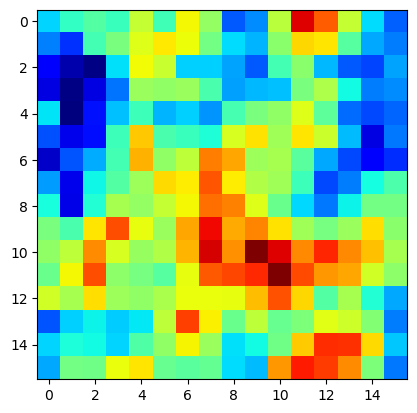

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def fftIndgen(n):
    a = list(range(0, n//2+1))
    b = list(range(1, n//2))
    b.reverse()
    b = [-i for i in b]
    return a + b

def gaussian_random_field(Pk = lambda k : k**-3.0, size = 100):
    def Pk2(kx, ky):
        if kx == 0 and ky == 0:
            return 0.0
        return np.sqrt(Pk(np.sqrt(kx**2 + ky**2)))
    noise = np.fft.fft2(np.random.normal(size = (size, size)))
    amplitude = np.zeros((size,size))
    for i, kx in enumerate(fftIndgen(size)):
        for j, ky in enumerate(fftIndgen(size)):            
            amplitude[i, j] = Pk2(kx, ky)
    return np.fft.ifft2(noise * amplitude)

for alpha in [-3]:
    out = gaussian_random_field(Pk = lambda k: k**alpha, size=16)
    plt.figure()
    plt.imshow(out.real, interpolation='none',cmap='jet')

image1=out.real
print(out.real.std())
#fimage1=np.fft.fft2(image1)
#fimage1_=np.fft.fftshift(fimage1)


In [63]:

#plt.imshow(outg, interpolation='none',cmap='jet')
from scipy.ndimage import gaussian_filter
xtL=[]
for it in range(5000):
    outg=np.random.randn(15,15)
    outg=gaussian_filter(outg, sigma=1.5)
    xtL.append((outg[5:10,5:10]*np.random.randn(5,5)).flatten())

xtL=np.array(xtL)
print(xtL.std(axis=0))
#plt.imshow(outg, interpolation='none',cmap='jet')
#print(outg[5:10,5:10].std())   

[0.18941588 0.18785106 0.18638099 0.19255177 0.18465748 0.18698106
 0.19870558 0.20052448 0.18756234 0.19365366 0.18973606 0.18973742
 0.19478938 0.1898847  0.18756787 0.19460236 0.18714695 0.18863749
 0.18731845 0.19221165 0.18345568 0.18591792 0.19362186 0.18918713
 0.19012512]


In [18]:
xL=[]
for i in range(0,59):
    for j in range(0,59):
        xL.append(out.real[i:i+5,j:j+5].flatten())

xL=np.array(xL)
#import pca
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
pca.fit(xL)
print(pca.explained_variance_ratio_.cumsum())

[0.44839082 0.5373653  0.62435127 0.66572699 0.70391224 0.73720109
 0.76252525 0.78621667 0.80805087 0.82636749 0.8443354  0.86071087
 0.87612452 0.88940697 0.90221979]


In [16]:
print(xL.mean(axis=0))  

[0.00095847 0.00040305 0.00051063 0.0006835  0.00126138 0.00156805
 0.00099585 0.00113519 0.00131193 0.00194002 0.00152196 0.0009356
 0.00104646 0.00122321 0.00185084 0.00138278 0.00076906 0.00093006
 0.00110531 0.00170538 0.00144081 0.00086193 0.00101437 0.00117158
 0.00174158]


0.9999749363885699


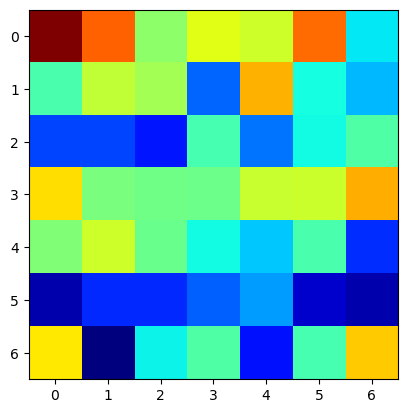

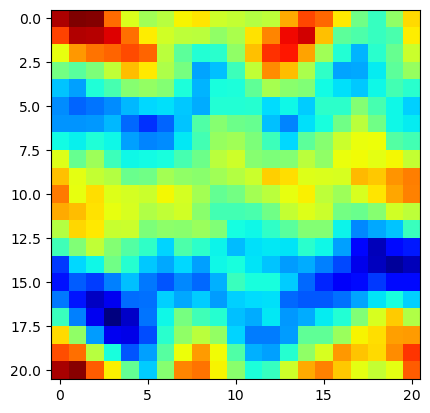

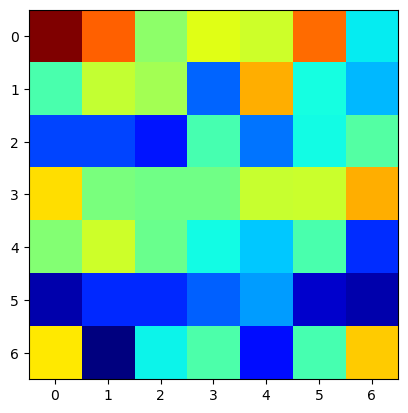

In [37]:
#plt.imshow(image2_rebinned,interpolation='none',cmap='jet')

image2_t=np.zeros((21,21),complex)
image2_t[7:14,7:14].real=fimage1_[0:7,0:7].real
image2_t[7:14,7:14].imag=fimage1_[0:7,0:7].imag
image2_t.real+=np.random.randn(21,21)*0.2


fimage2=np.fft.ifftshift(image2_t)
image2=np.fft.ifft2(fimage2)

plt.imshow(out.real,interpolation='none',cmap='jet')
plt.figure()
plt.imshow(image2.real,interpolation='none',cmap='jet')

image2_rebinned=np.zeros((7,7),float)
for i in range(7):
    for j in range(7):
        image2_rebinned[i,j]=image2.real[i*3:i*3+3,j*3:j*3+3].mean()
        if abs(image2_rebinned[i,j])>0.01:
            image2.real[i*3:i*3+3,j*3:j*3+3]*=out.real[i,j]/image2_rebinned[i,j]
            image2_rebinned[i,j]=image2.real[i*3:i*3+3,j*3:j*3+3].mean()
        else:
            image2.real[i*3:i*3+3,j*3:j*3+3]+=out.real[i,j]
            image2_rebinned[i,j]=image2.real[i*3:i*3+3,j*3:j*3+3].mean()
plt.figure()
plt.imshow(image2_rebinned,interpolation='none',cmap='jet')
print(np.corrcoef(out.real.flatten(),image2_rebinned.flatten())[0,1])